# LPBF Process Optimization: Power and Speed Correlation

## Introduction

In Laser Powder Bed Fusion (LPBF), the interplay between the laser's power and the speed of the process is vital for achieving optimal part quality. This Jupyter notebook delves into experimental data to uncover the relationship between these parameters across different operational modes and their impact on build quality.

### Objective

The goal of this analysis is to visualize and analyze the correlation between laser power (in watts) and process speed (in mm/s) under various operational modes used in LPBF. We aim to derive insights that can guide the fine-tuning of LPBF process parameters to enhance the quality and consistency of manufactured parts.

### Dataset Overview

The analysis will be based on two sets of data:

1. `Photodiode_2.xlsx`: This file contains the optical microscope observations from the samples cross-sections, indicative of the part quality during the LPBF process. It includes details such as `Cube` identification, `Line` number, `Measurement` values, operational `Mode`, and a `Valid` score assessing the certainty of the observation.

2. `Parameters.xlsx`: This file catalogs the entire process parameters used during the experiment, specifying the speed and power settings for each recorded line.

### Analysis Workflow

The notebook will undertake the following key steps:

1. **Data Loading**: Importing the necessary data from the provided Excel sheets while ensuring proper formatting for subsequent analysis.

2. **Data Integration**: Merging the two excel sheets using their corresponding LPBF parameters based on cube and line identifiers to align each measurement with its process settings.

3. **Visualization**: Creating scatter plots to depict the power-speed relationship, color-coding each data point according to the LPBF mode. The validity of their observations will be visualized by varying the size of the scatter plot markers.

4. **Interpretation**: Drawing insights from the visual data representation to understand the influence of power and speed on the LPBF process and the resulting part quality.

This notebook aims to contribute to the process optimization efforts in LPBF by highlighting the parameters that yield the best outcomes in terms of part quality.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib notebook

In [2]:
def plot_cube_data(cube_number):
    # File paths
    photodiode_file_path = './Photodiode_2.xlsx'  
    parameters_file_path = './Parameters.xlsx'   

    # Load the specific sheet for the chosen cube from the Parameters.xlsx file
    cube_parameters_data = pd.read_excel(parameters_file_path, sheet_name=f'Cube {cube_number}')

    # Extract information for the chosen cube from the Photodiode_2.xlsx file
    cube_photodiode_data = pd.read_excel(photodiode_file_path)
    cube_photodiode_data = cube_photodiode_data[cube_photodiode_data['Cube'] == cube_number]
    cube_photodiode_data['Line '] = cube_photodiode_data['Line '].astype(cube_parameters_data['#'].dtype)

    # Merge the data from the chosen cube photodiode data with the parameters based on the 'Line ' number
    merged_cube_data = pd.merge(
        left=cube_photodiode_data,
        right=cube_parameters_data,
        left_on='Line ',
        right_on='#',
        how='inner'
    )

    # Define color mapping for the modes, including all possible modes across cubes
    color_mapping = {'C': 'green', 'T': 'orange', 'CT': 'orange', 'K': 'red', 'CTK': 'orange'}

    # Map the validity scores to dot sizes (e.g., score * 10 for visibility)
    dot_sizes = merged_cube_data['Valid (0-5; 0 =invalid, 5=perfect lines)'] * 10

    # Assign colors to each mode in the dataset for the chosen cube
    colors = merged_cube_data['Mode'].map(color_mapping)

    # Create the scatter plot for the chosen cube
    plt.figure(figsize=(10, 6))
    plt.scatter(
        merged_cube_data['Powers (W)'],
        merged_cube_data['Speed (mm/s)'],
        s=dot_sizes,  # Use the dot_sizes for the 's' parameter
        c=colors,
        alpha=0.7,  # Optional: Set a fixed alpha for all dots to manage overall dot transparency
        label=color_mapping.keys()
    )

    # Create a custom legend for the modes
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='C', markerfacecolor='green', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='T/CT/CTK', markerfacecolor='orange', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='K', markerfacecolor='red', markersize=10)
    ]

    # Add the legend to the plot
    plt.legend(handles=legend_elements, title='Mode')

    # Add labels and a title to the plot
    plt.xlabel('Power (W)')
    plt.ylabel('Speed (mm/s)')
    plt.title(f'Scatter Plot of Speed vs Power by Mode for Cube {cube_number}')

    # Show the plot
    plt.show()
    

<IPython.core.display.Javascript object>


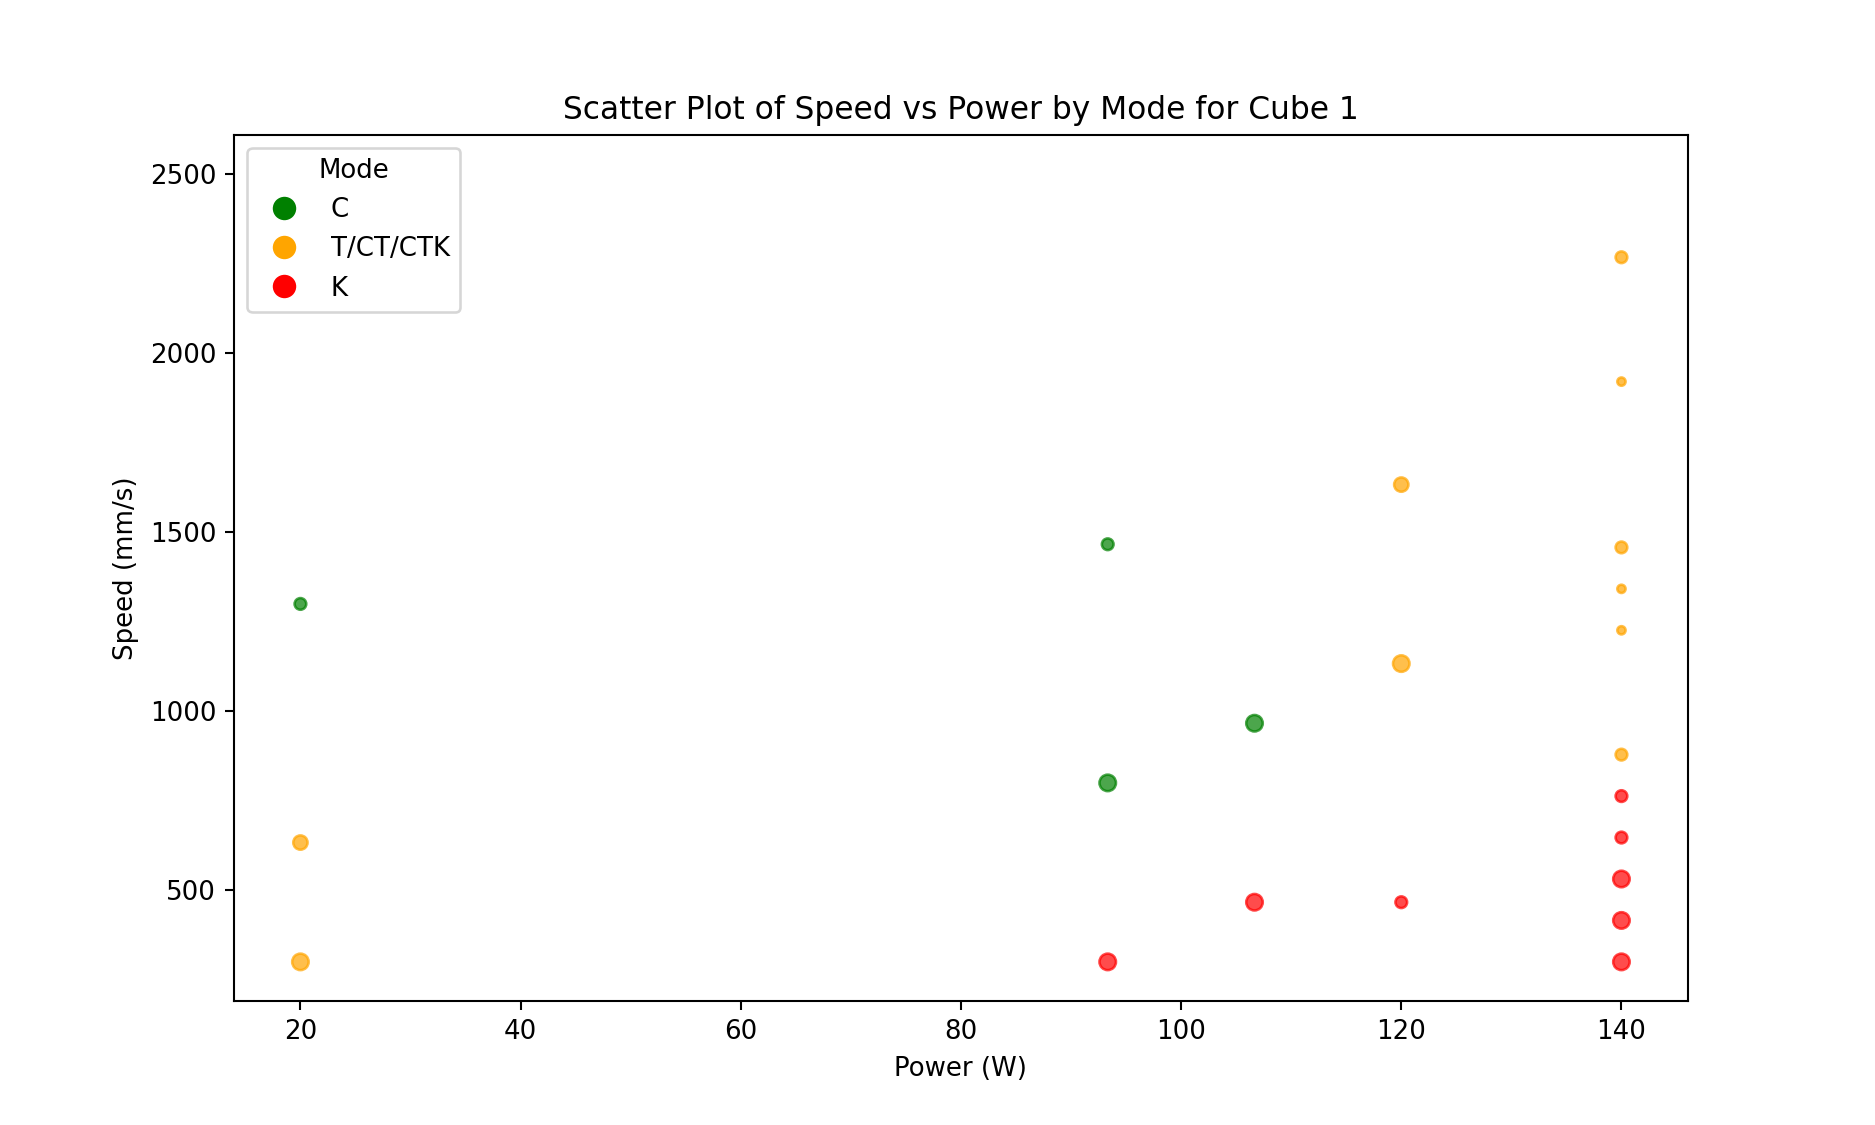

In [3]:
plot_cube_data(cube_number=1)


<IPython.core.display.Javascript object>


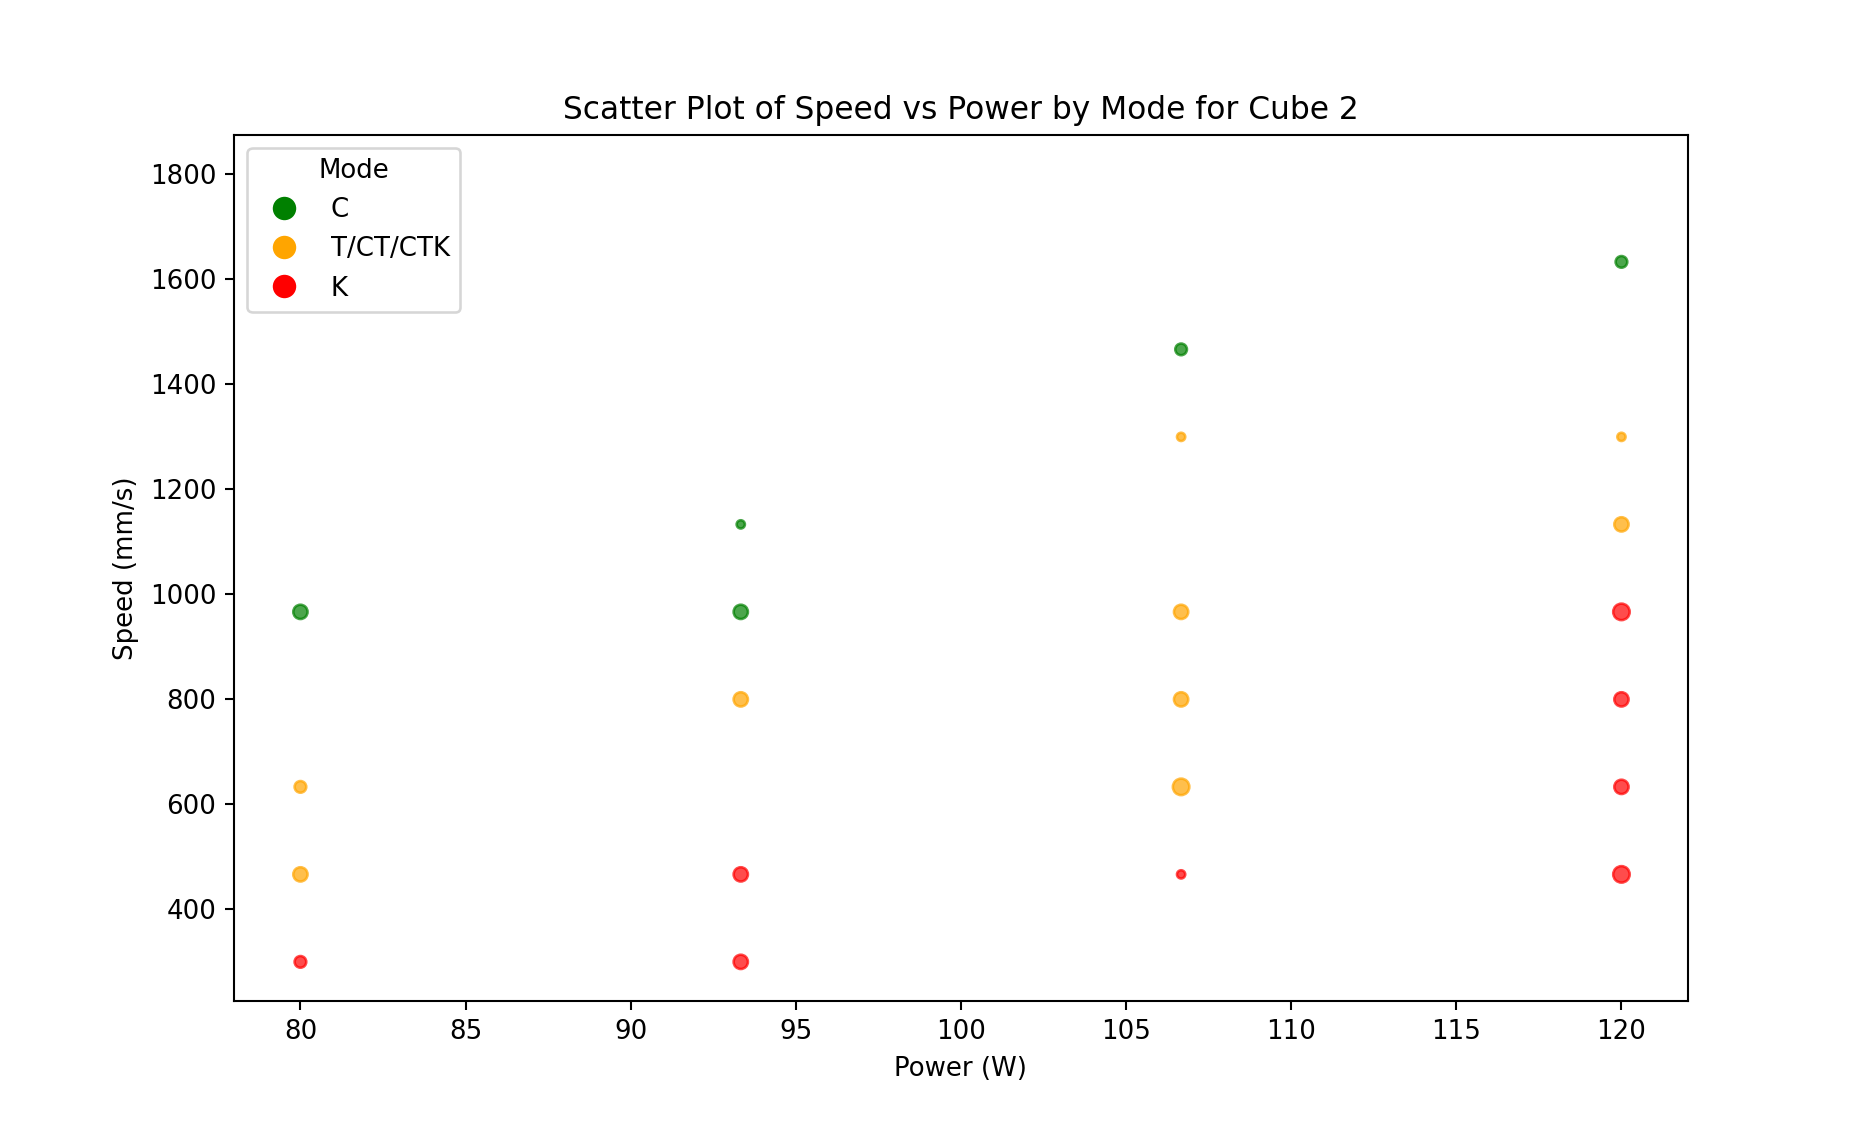

In [4]:
plot_cube_data(cube_number=2)


<IPython.core.display.Javascript object>


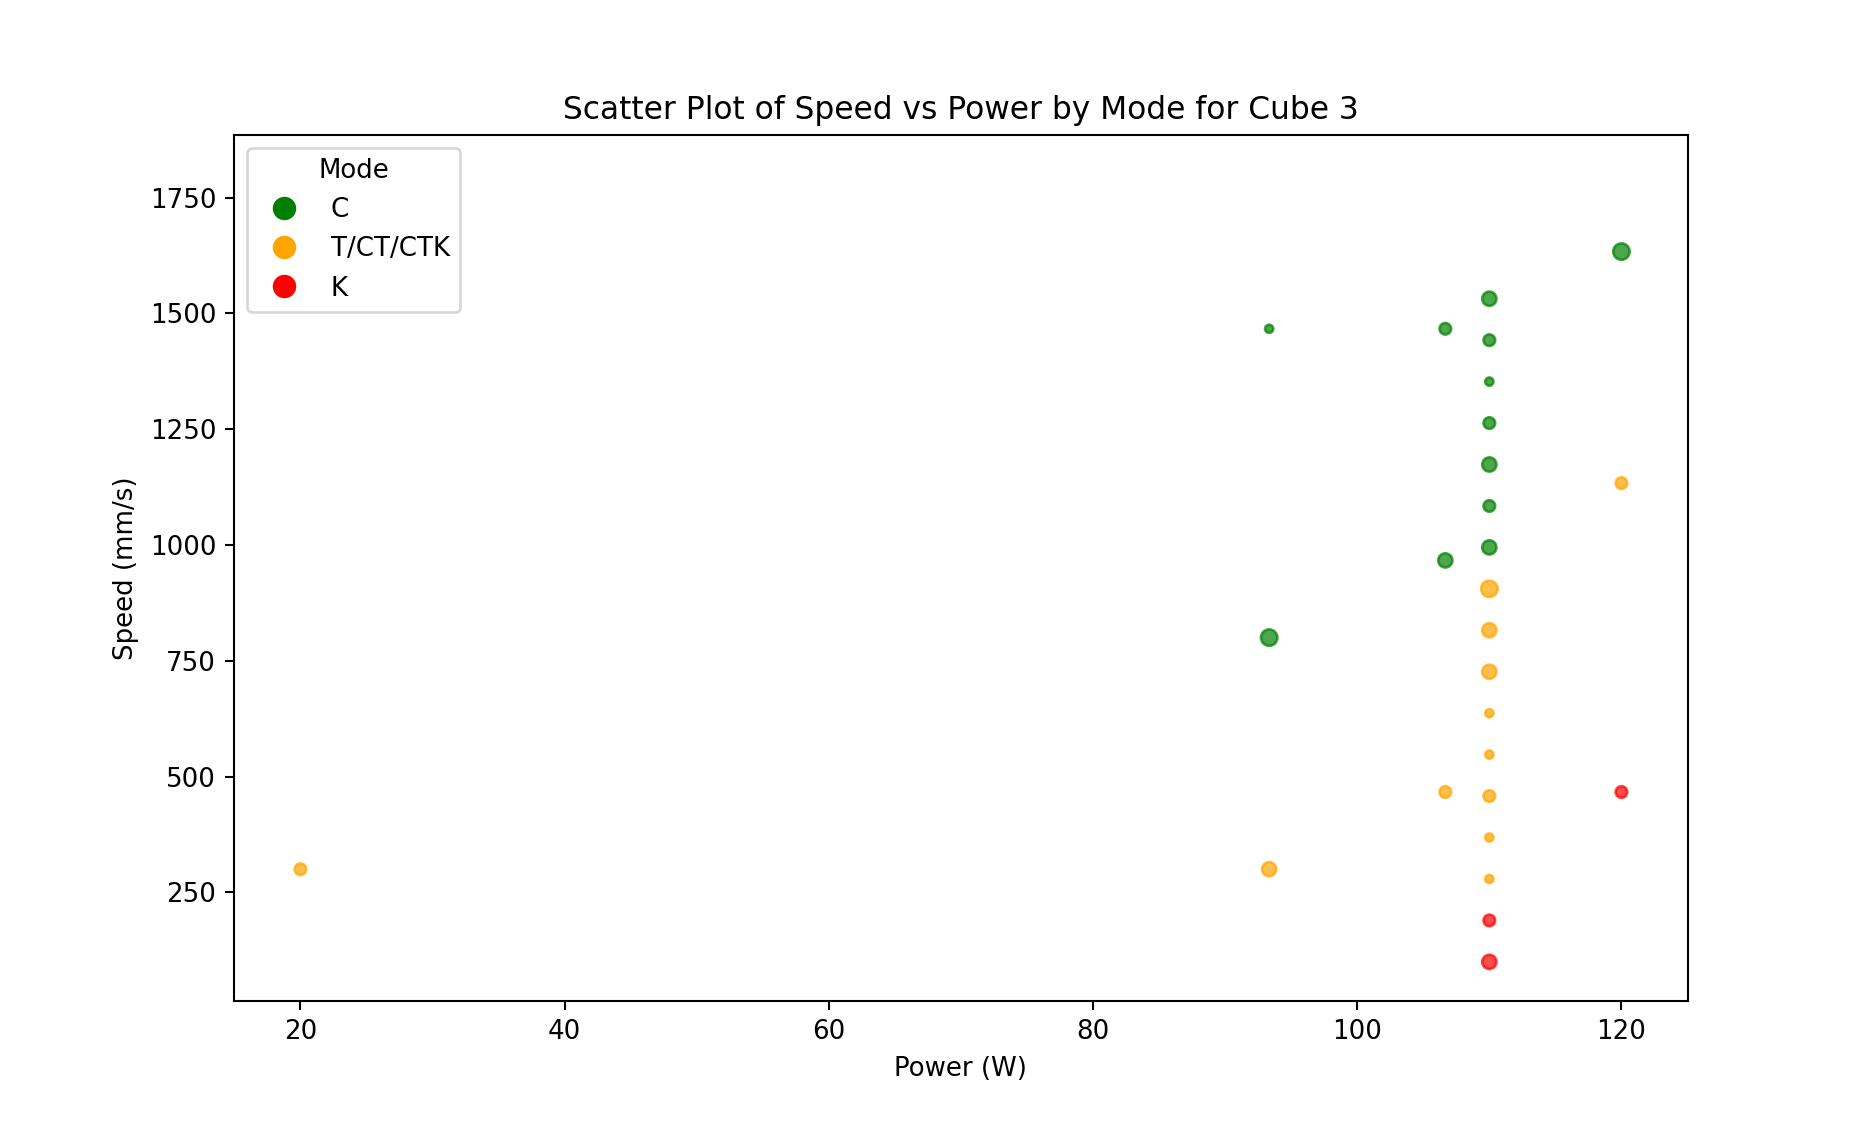

In [5]:
plot_cube_data(cube_number=3)


<IPython.core.display.Javascript object>


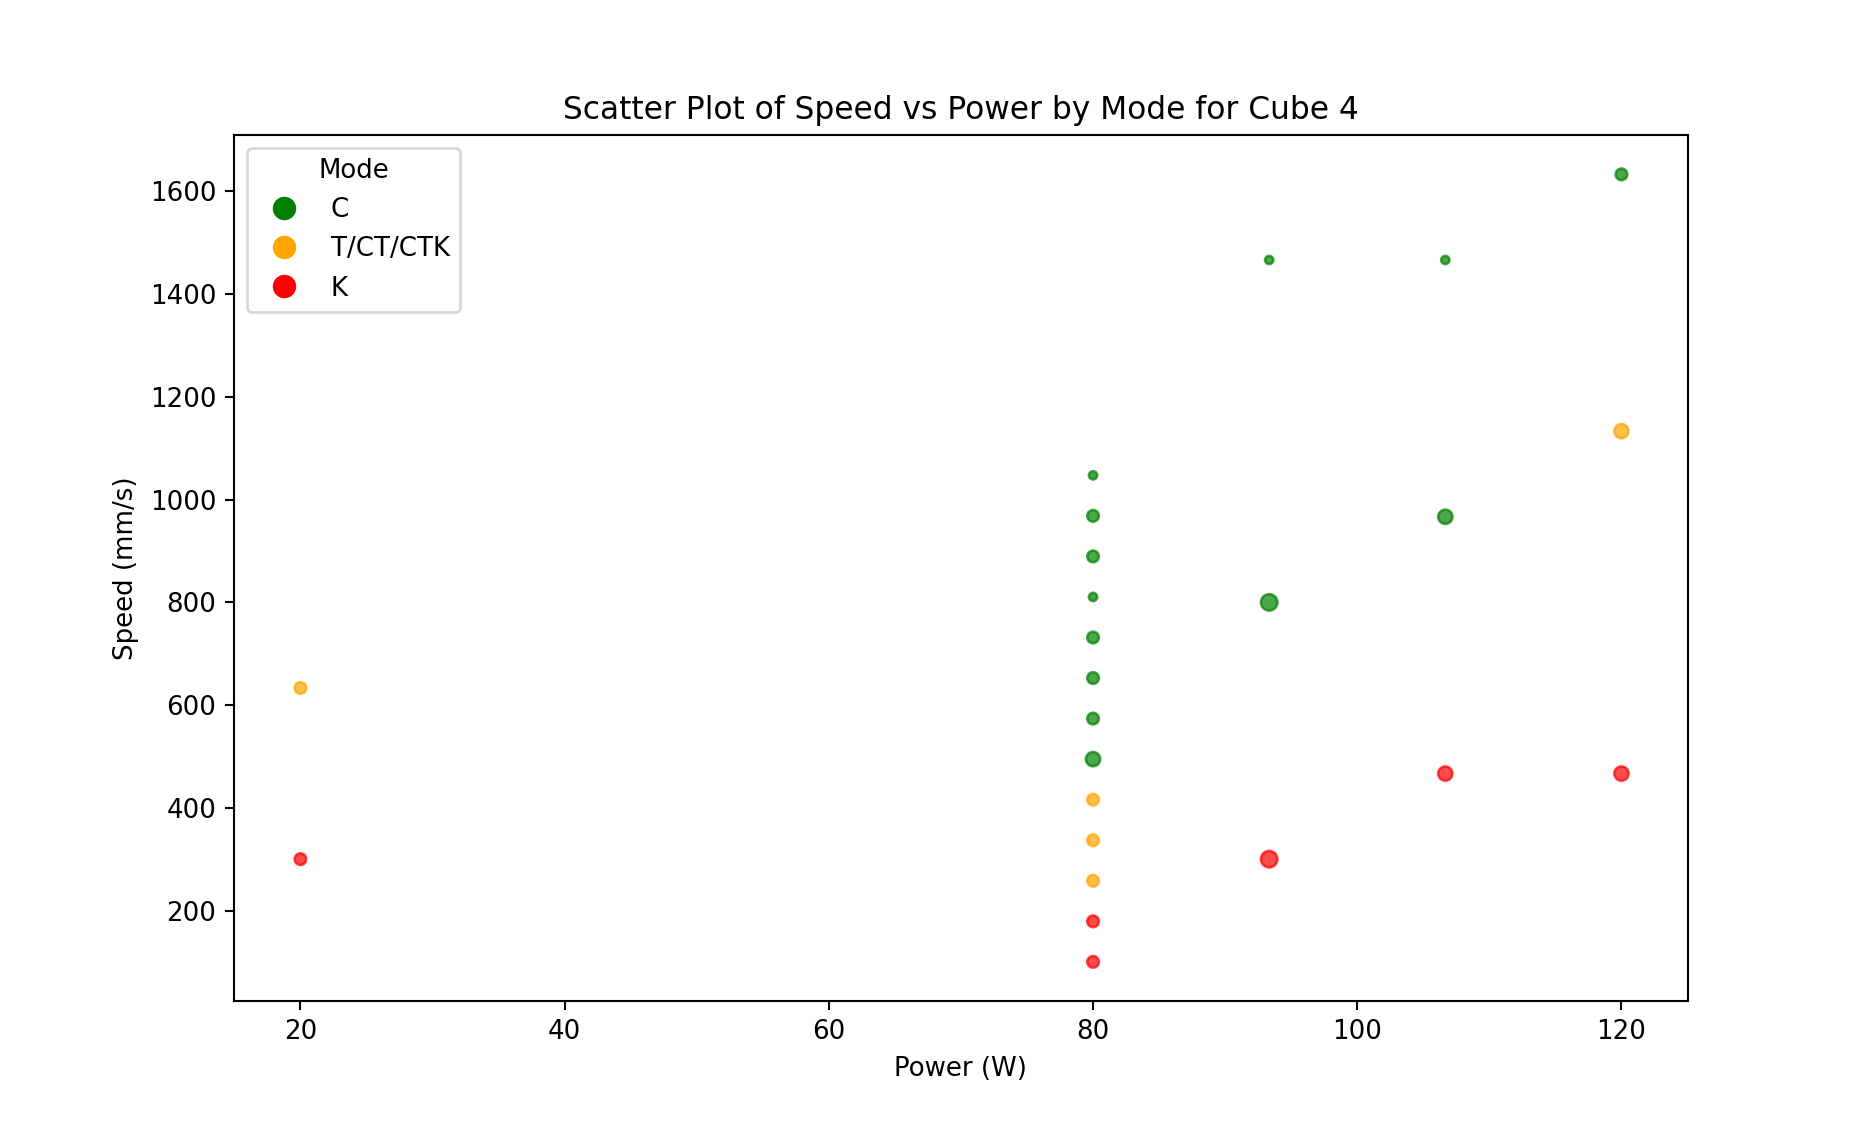

In [6]:
plot_cube_data(cube_number=4)


<IPython.core.display.Javascript object>


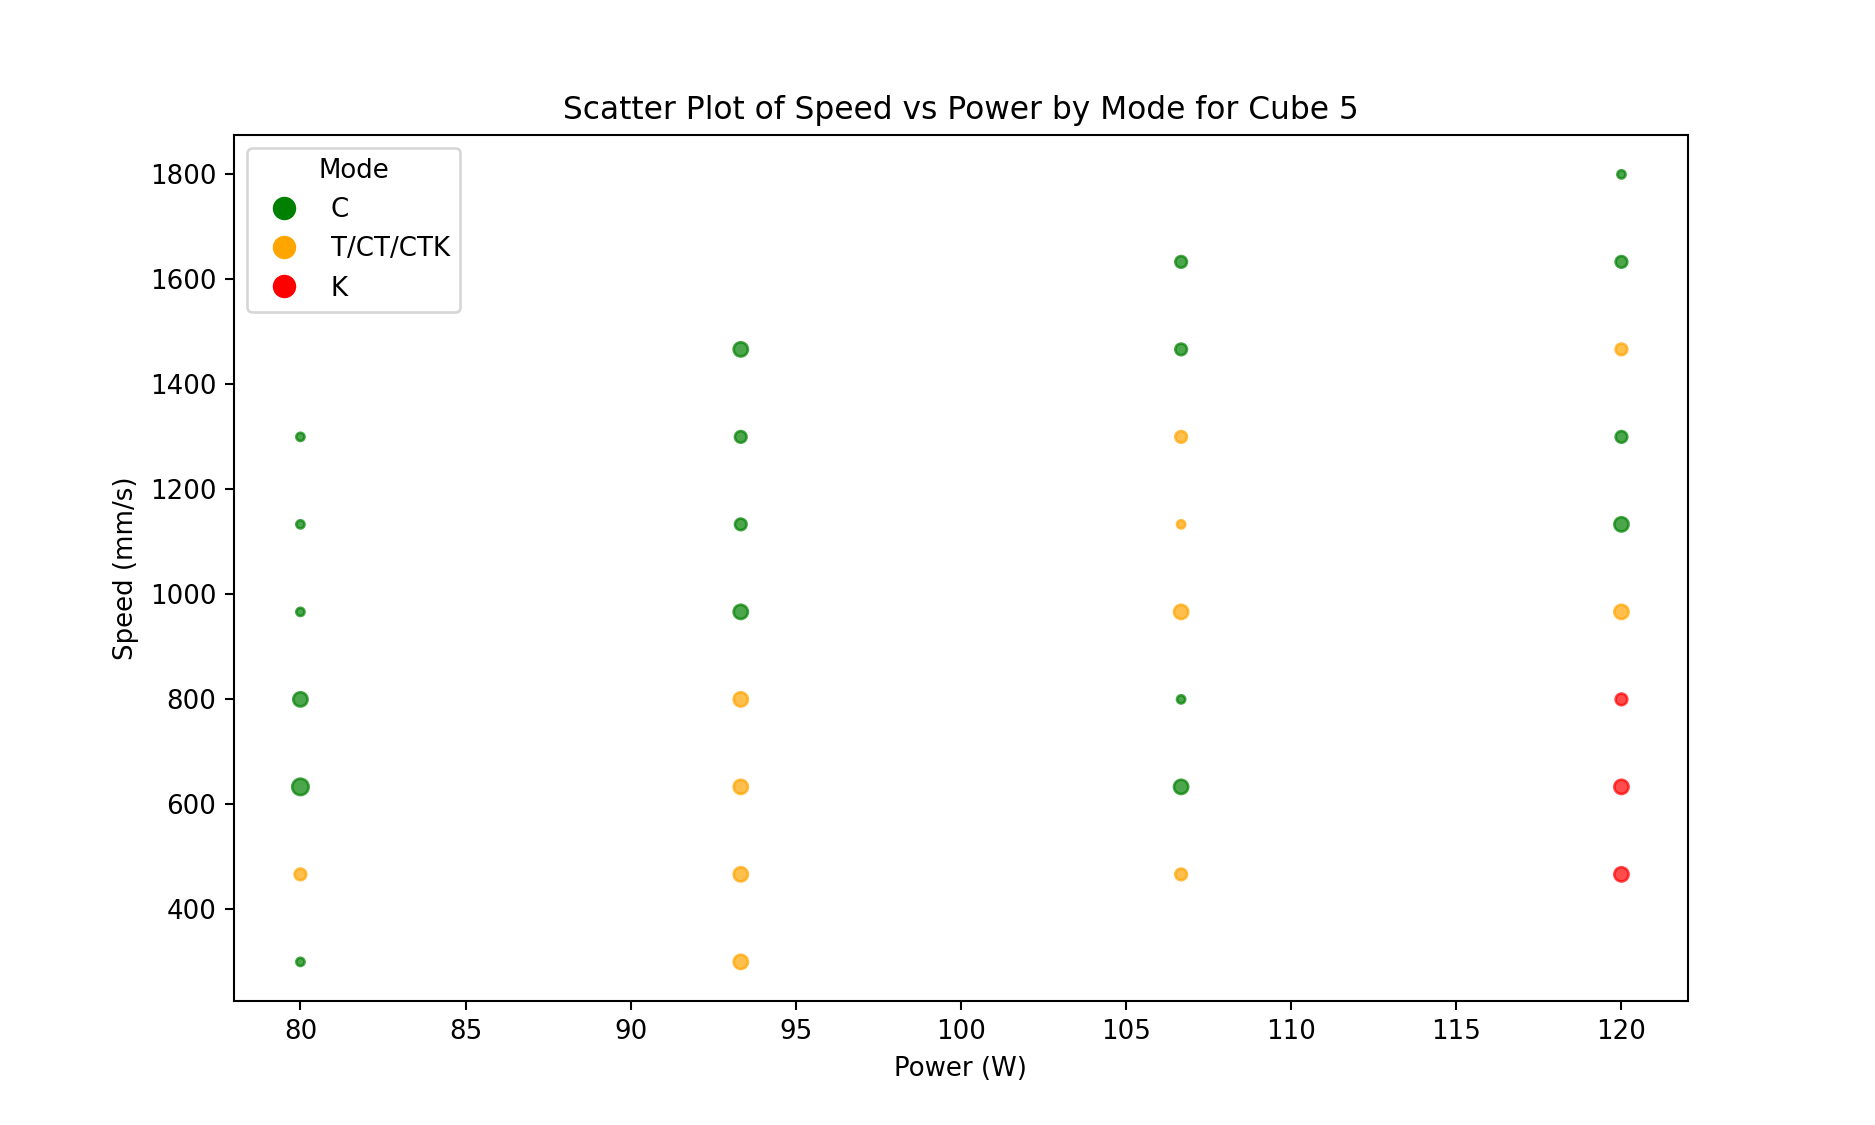

In [7]:
plot_cube_data(cube_number=5)
